In [33]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [34]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

In [35]:
train_images.dtype

dtype('uint8')

In [36]:
train_images.shape

(60000, 28, 28)

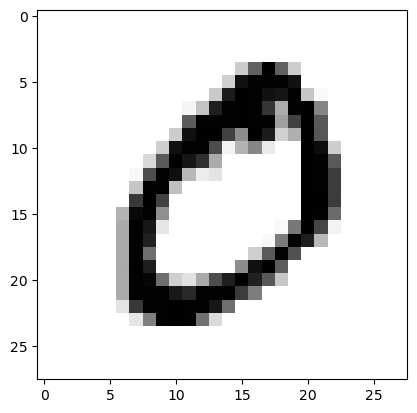

In [37]:
plt.imshow(train_images[1,:,:],cmap=plt.cm.binary)
plt.show()

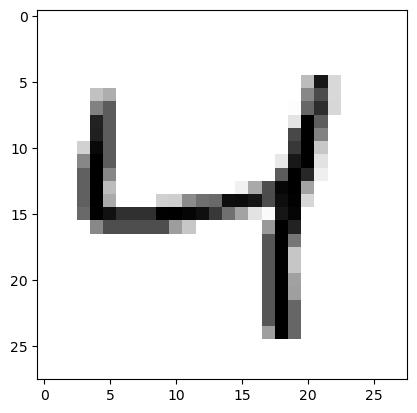

In [38]:
plt.imshow(train_images[2,:,:],cmap=plt.cm.binary)
plt.show()

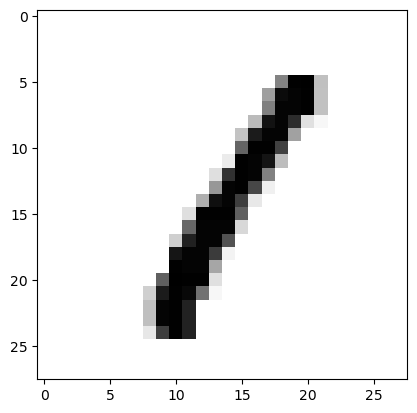

In [39]:
plt.imshow(train_images[3,:,:],cmap=plt.cm.binary)
plt.show()

In [40]:
train_labels.shape

(60000,)

In [41]:
train_labels[1]

0

In [42]:
train_labels[2]

4

In [43]:
test_images.shape

(10000, 28, 28)

In [44]:
test_images.ndim

3

In [45]:
train_images =train_images.reshape((60000,28*28))
train_images =train_images.astype("float32")/255
                                   

In [46]:
test_images =test_images.reshape((10000,28*28))
test_images =test_images.astype("float32")/255

In [47]:
train_images.shape

(60000, 784)

In [48]:
test_images.shape

(10000, 784)

In [49]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [50]:
from keras import models
from keras import layers

In [51]:
model = models.Sequential()

In [52]:
model.add(layers.Dense(512, activation = "relu", input_shape = (28*28, )))
model.add(layers.Dense(10, activation = "softmax"))

C:\Users\prath\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer= "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [55]:
model.fit(train_images,
         train_labels,
         epochs = 5,
         batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8775 - loss: 0.4324
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1170
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0747
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9849 - loss: 0.0530
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0374


In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9754 - loss: 0.0799
test_loss :  0.06648831069469452 
test_acc :  0.9796000123023987


In [57]:
y_prob = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


In [58]:
test_label_pred= y_prob.argmax(axis=1)

In [59]:
test_label_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [62]:
import numpy as np

In [63]:
new_data = test_images[:10]  # Example: Take the first 10 test images
predictions = model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [64]:
predicted_labels = np.argmax(predictions, axis=1)

In [65]:
predicted_labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)